In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드하기
df = pd.read_csv("data/crime_final.csv")
df.shape

(374, 6)

In [ ]:
df.head(20)

,연도,범죄명,자백발생횟수,재범발생횟수,공범자수,마약소지
0,2011,강간·강제추행,17652,8324,0,14
1,2011,강도,4890,3230,0,12
2,2011,공갈,3786,1949,0,5
3,2011,교통범죄,524350,253502,0,82
4,2011,기타범죄,224781,111959,0,102
5,2011,노동범죄,2641,1612,0,0
6,2011,도박범죄,46174,31382,0,27
7,2011,마약범죄,5409,3382,0,2947
8,2011,문서·인장,22105,5817,0,12
9,2011,방화,1519,977,0,0


###폰트설정###

In [ ]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와줍니다.
get_font_family()


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'NanumBarunGothic'

In [ ]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


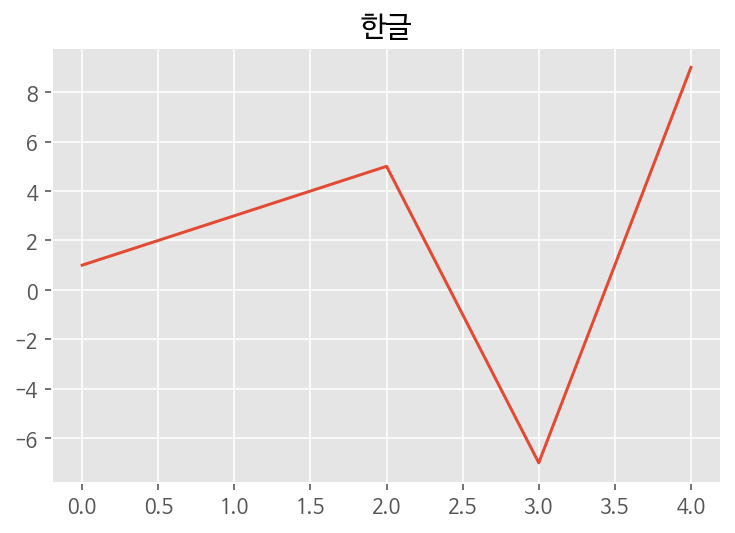

In [ ]:
#폰트 설정 확인하기 
# 한글 폰트가 정상적으로 작동하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

###시각화하기###

In [ ]:
# "범죄명" column의 value별 개수를 확인해 봅니다.
df["범죄명"].value_counts()

손괴             10
체포·감금          10
약취·유인          10
유가증권인지         10
절도범죄           10
증수뢰            10
직권남용           10
직무유기           10
통화             10
강도             10
특별경제범죄         10
폭력행위등          10
폭행             10
협박             10
환경범죄           10
횡령             10
안보범죄           10
성풍속범죄          10
방화             10
공갈             10
상해             10
살인미수등          10
살인기수           10
사기             10
보건범죄           10
병역범죄           10
배임             10
선거범죄           10
문서·인장          10
마약범죄           10
도박범죄           10
노동범죄           10
기타범죄           10
교통범죄           10
강제추행            8
기타 강간·강제추행등     8
유사강간            8
강간              8
강간·강제추행         2
Name: 범죄명, dtype: int64

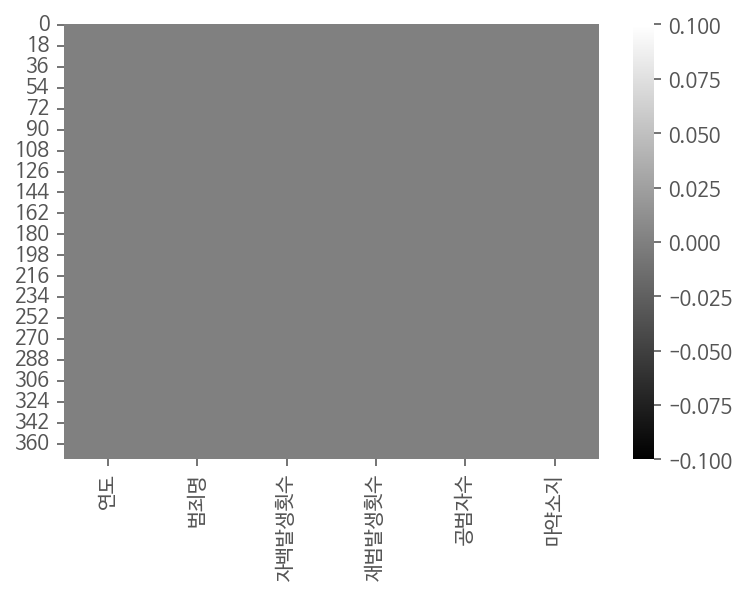

In [ ]:
# null값이 있는지 시각화해보기 
sns.heatmap(df.isnull(), cmap="gray")


null값이 존재하지 않는 것을 알 수 있다.

In [ ]:
# CROSSTAB으로 두 개의 빈도수 구하기 
pd.crosstab(index=df["연도"], columns=df["범죄명"])

범죄명,강간,강간·강제추행,강도,강제추행,공갈,교통범죄,기타 강간·강제추행등,기타범죄,노동범죄,도박범죄,...,직권남용,직무유기,체포·감금,통화,특별경제범죄,폭력행위등,폭행,협박,환경범죄,횡령
연도,,,,,,,,,,,,,,,,,,,,,
2011,0,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012,0,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2013,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2014,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2015,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2017,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2018,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2019,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


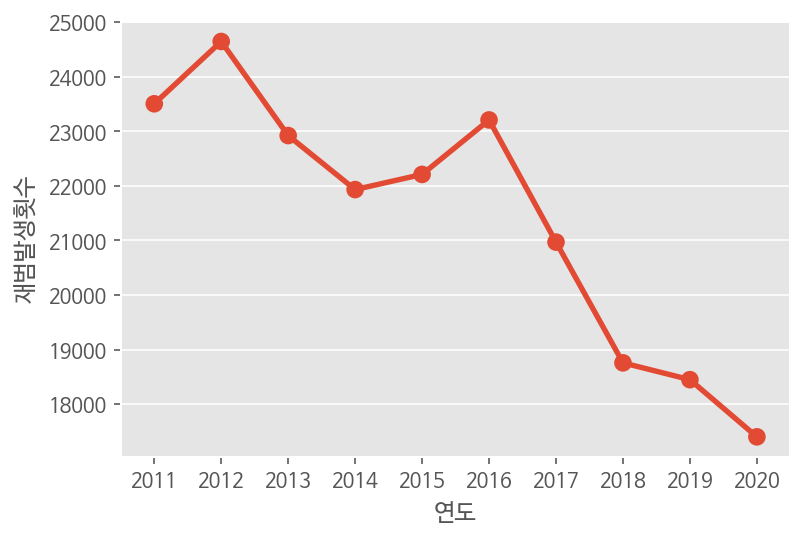

In [ ]:
# pointplot 으로 연도별 재범발생횟수를 시각화 합니다.

sns.pointplot(data=df, x="연도", y="재범발생횟수", ci=None, )

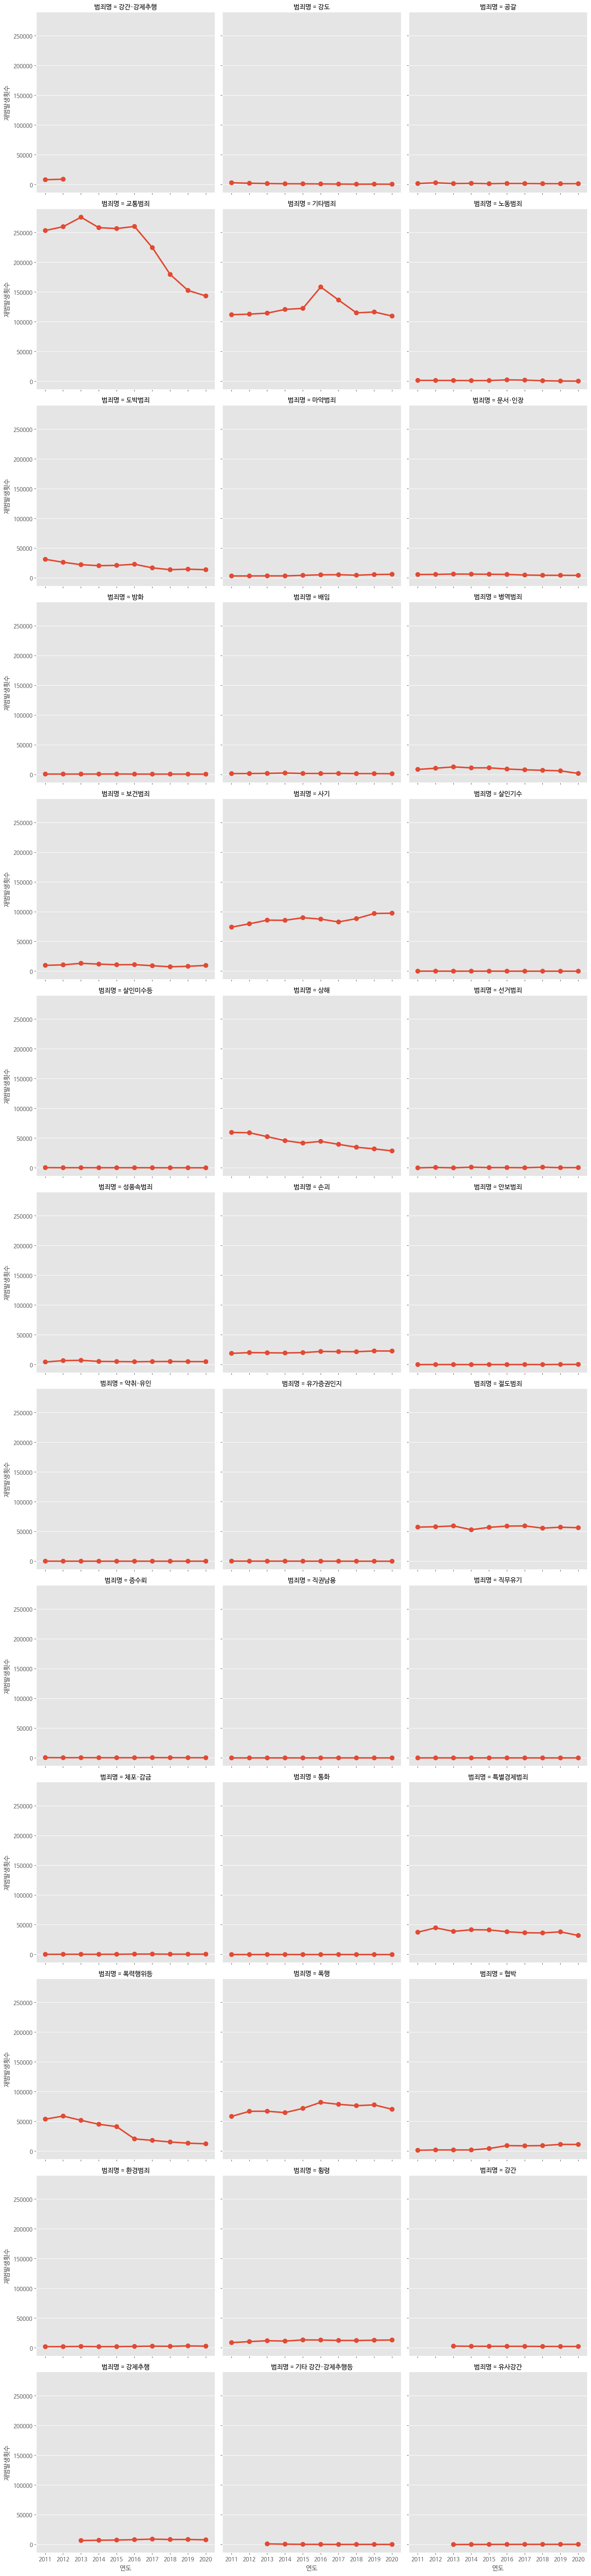

In [ ]:
# catplot 으로 연도별 각각 범죄의 재범발생횟수를 pointplot으로 시각화 합니다.
sns.catplot(data=df, x="연도", y="재범발생횟수", kind="point", 
             ci=None,  col="범죄명", col_wrap=3)


다른 범죄들은 대부분 연도별 재범발생횟수가 비슷했으나 
올라가는 추세 : 횡령, 강간, 상해 
내려가는 추세 : 환경범죄, 손괴, 방화, 도박범죄 
로 나타났다. 
그 중에서 도박범죄의 그래프가 높은 기울기로 하강하는 것을 보였다. 

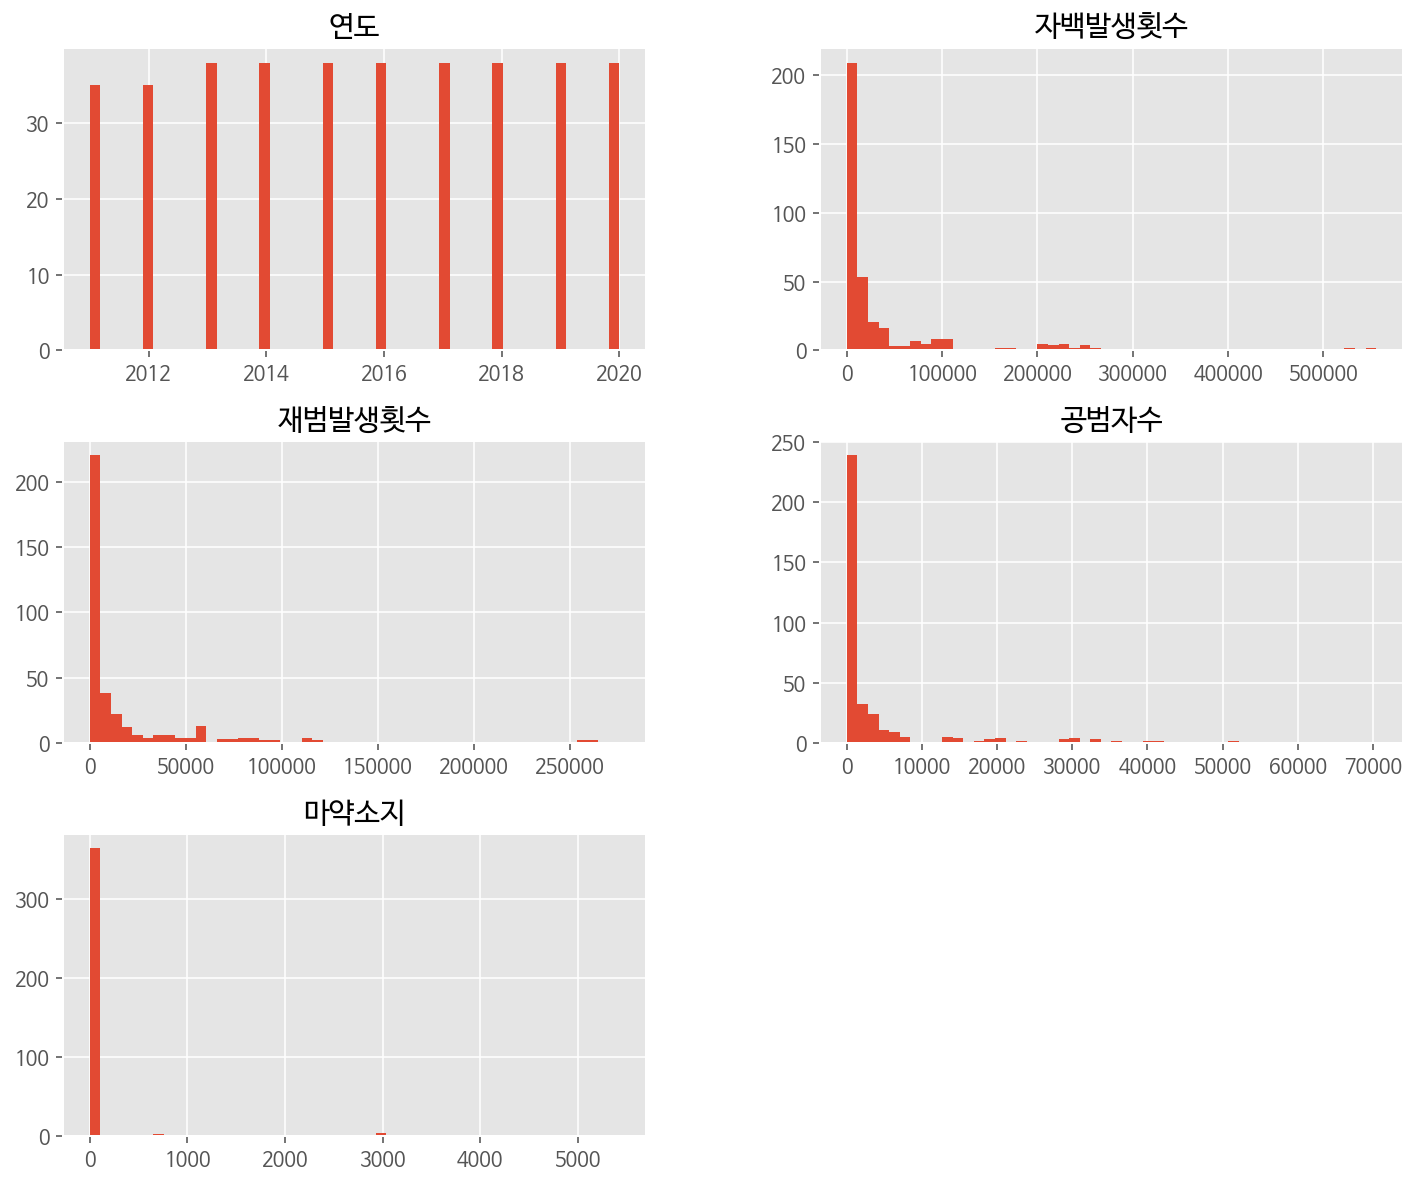

In [ ]:
# 히스토그램 그려보기 
_ = df.hist(figsize=(12, 10), bins=50)

In [ ]:
# df의 상관관계를 구합니다.
corr = df.corr()
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

###heatmap 그리기###

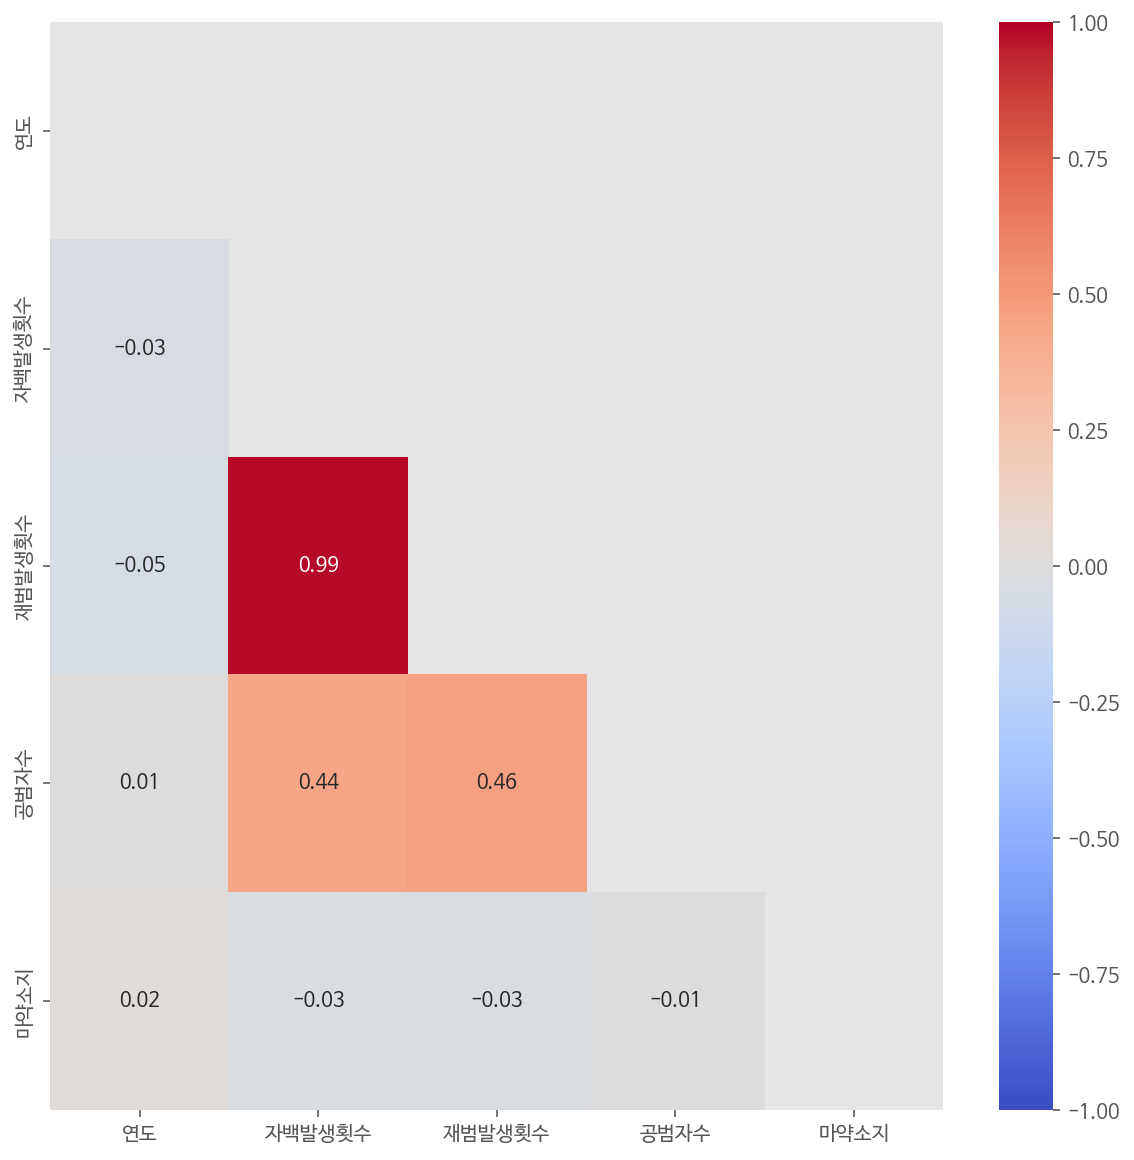

In [ ]:
# NA/null 값을 제외한 열의 쌍별 상관 관계에 대해 heatmap을 그립니다.
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, fmt=".2f")

그 결과 재범발생횟수와 자밸발생횟수가 높은 상관관계를 가진 것으로 확인되었다. 

###groupby 후 시각화 해보기###

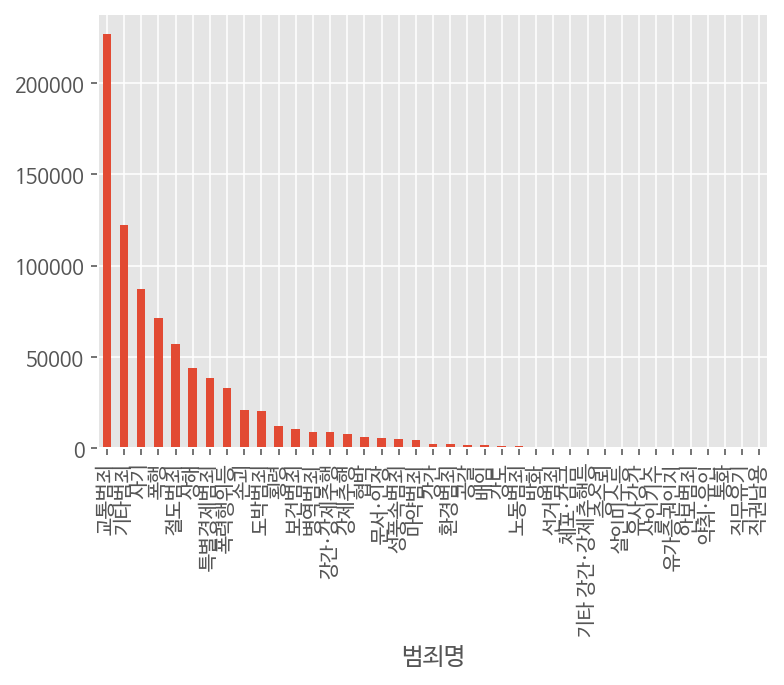

In [ ]:
# 범죄명으로 재범발생횟수의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df.groupby(by=["범죄명"])["재범발생횟수"].mean(
).sort_values(ascending=False).plot(kind="bar")

그 결과 교통범죄가 재범발생횟수가 높은 것을 알 수 있었습니다.

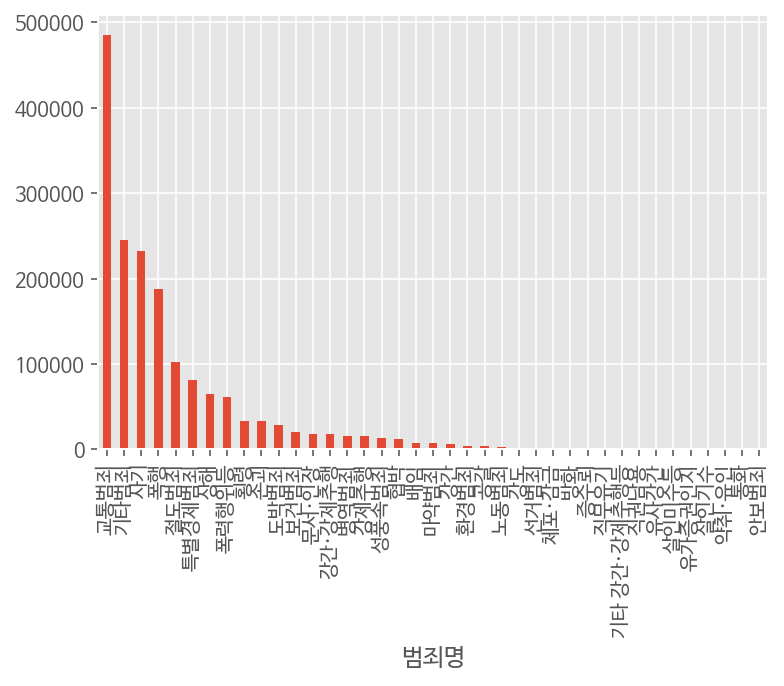

In [ ]:
# 범죄명으로 자백발생횟수의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df.groupby(by=["범죄명"])["자백발생횟수"].mean(
).sort_values(ascending=False).plot(kind="bar")

그 결과 교통범죄가 자백발생횟수 또한 높은 것을 알 수 있었습니다.

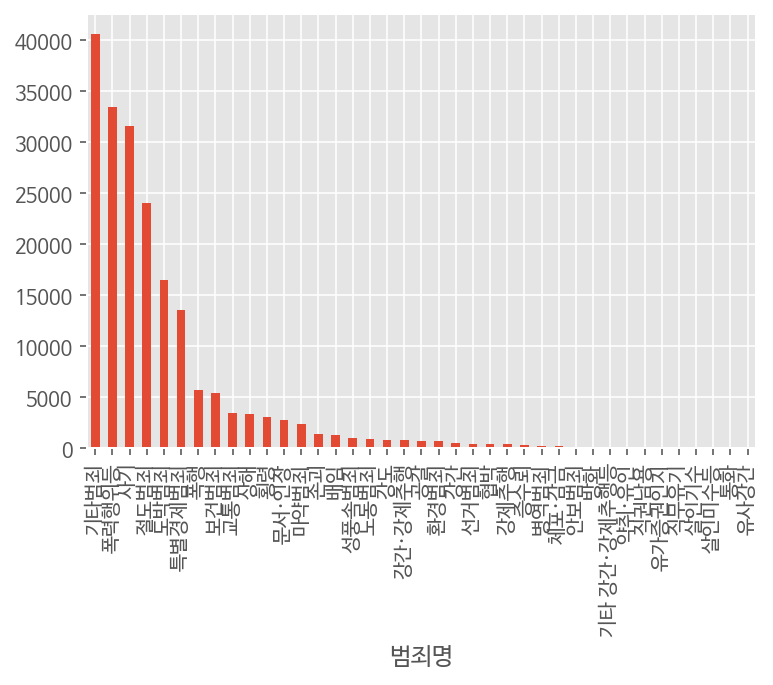

In [ ]:
# 범죄명으로 공범자수의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df.groupby(by=["범죄명"])["공범자수"].mean(
).sort_values(ascending=False).plot(kind="bar")

그 결과 폭행항위, 사기, 절도범죄가 공범자수가 많은 것을 알 수 있었습니다.

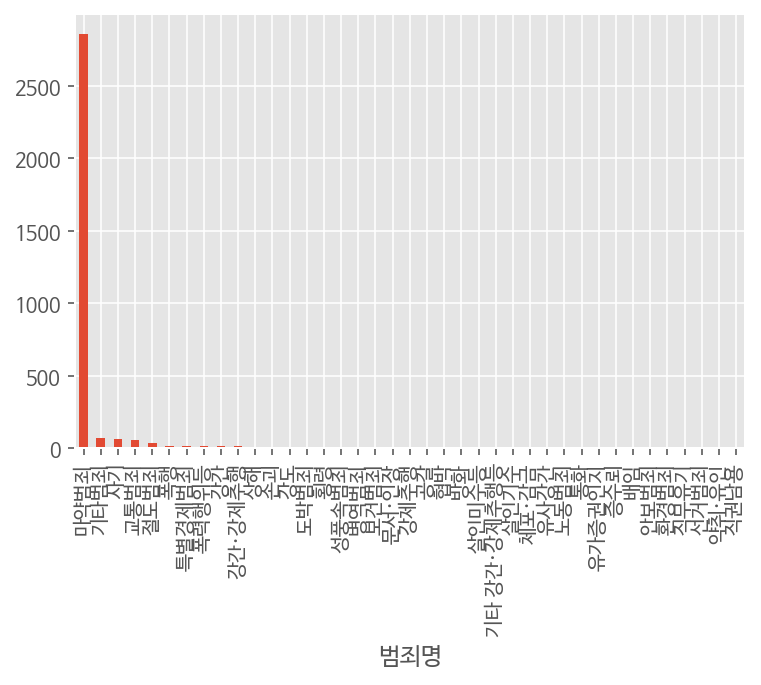

In [ ]:
# 범죄명으로 마약소지의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df.groupby(by=["범죄명"])["마약소지"].mean(
).sort_values(ascending=False).plot(kind="bar")

In [ ]:
# 연도, 범죄명으로 재범발생횟수의 평균을 구합니다.

graph_ = df.groupby(by=["연도", "범죄명"])["재범발생횟수"].mean().unstack()
graph_

범죄명,강간,강간·강제추행,강도,강제추행,공갈,교통범죄,기타 강간·강제추행등,기타범죄,노동범죄,도박범죄,...,직권남용,직무유기,체포·감금,통화,특별경제범죄,폭력행위등,폭행,협박,환경범죄,횡령
연도,,,,,,,,,,,,,,,,,,,,,
2011,NaN,8324.0,3230.0,NaN,1949.0,253502.0,NaN,111959.0,1612.0,31382.0,...,31.0,50.0,419.0,53.0,37610.0,53990.0,58551.0,1608.0,2029.0,8912.0
2012,NaN,9209.0,2391.0,NaN,3223.0,259955.0,NaN,112974.0,1506.0,26402.0,...,42.0,80.0,498.0,78.0,45000.0,59117.0,67122.0,2171.0,2127.0,10545.0
2013,3023.0,NaN,1887.0,6793.0,1833.0,275880.0,1157.0,114621.0,1394.0,22379.0,...,37.0,65.0,513.0,91.0,38951.0,51986.0,67253.0,2147.0,2484.0,12057.0
2014,2716.0,NaN,1514.0,7239.0,2211.0,258330.0,696.0,120899.0,1225.0,20669.0,...,37.0,43.0,459.0,76.0,41799.0,45358.0,64896.0,2212.0,2057.0,11464.0
2015,2666.0,NaN,1425.0,7593.0,1580.0,256826.0,387.0,122654.0,1295.0,21225.0,...,31.0,51.0,539.0,79.0,41454.0,41346.0,72047.0,4553.0,2132.0,13412.0
2016,2676.0,NaN,1250.0,8268.0,2000.0,260344.0,315.0,158595.0,2451.0,23093.0,...,29.0,40.0,844.0,65.0,38389.0,20737.0,82208.0,9494.0,2538.0,13254.0
2017,2595.0,NaN,1028.0,9168.0,1872.0,224720.0,199.0,136641.0,2019.0,17029.0,...,54.0,31.0,894.0,118.0,36691.0,18276.0,78850.0,9076.0,2918.0,12568.0
2018,2451.0,NaN,829.0,8501.0,1682.0,179640.0,255.0,115109.0,998.0,13953.0,...,56.0,20.0,687.0,60.0,36396.0,15524.0,76592.0,9510.0,2652.0,12429.0
2019,2392.0,NaN,923.0,8557.0,1619.0,152778.0,259.0,116561.0,524.0,14812.0,...,49.0,26.0,681.0,47.0,38252.0,13575.0,77946.0,11506.0,3353.0,12932.0


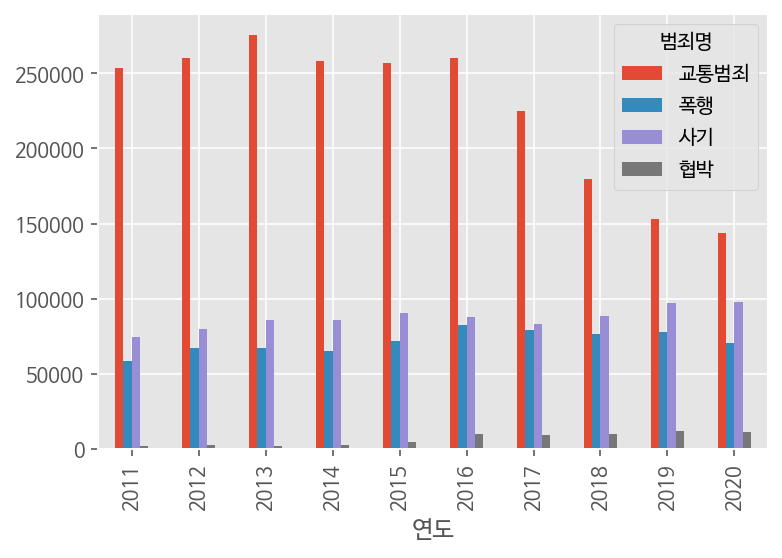

In [ ]:
graph_[["교통범죄","폭행","사기","협박"]].plot.bar()

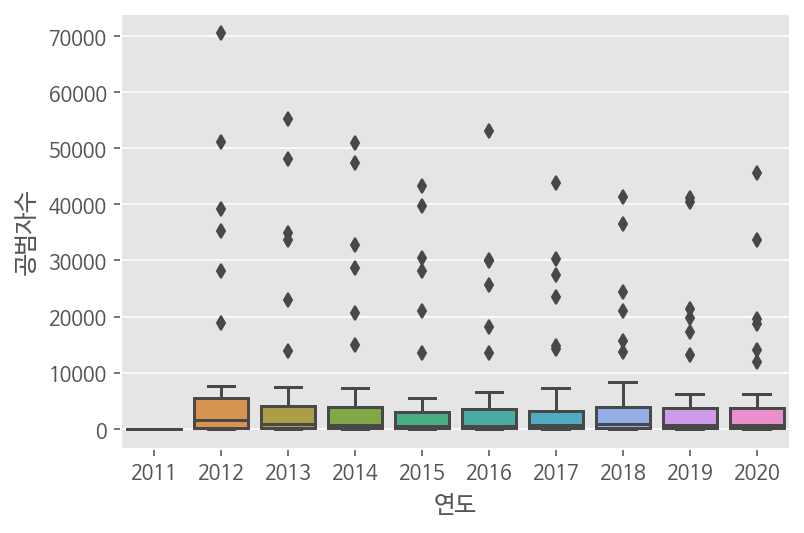

In [ ]:
# 연도별 재범발생횟수 boxplot 그리기

sns.boxplot(data=df, x="연도", y="공범자수")

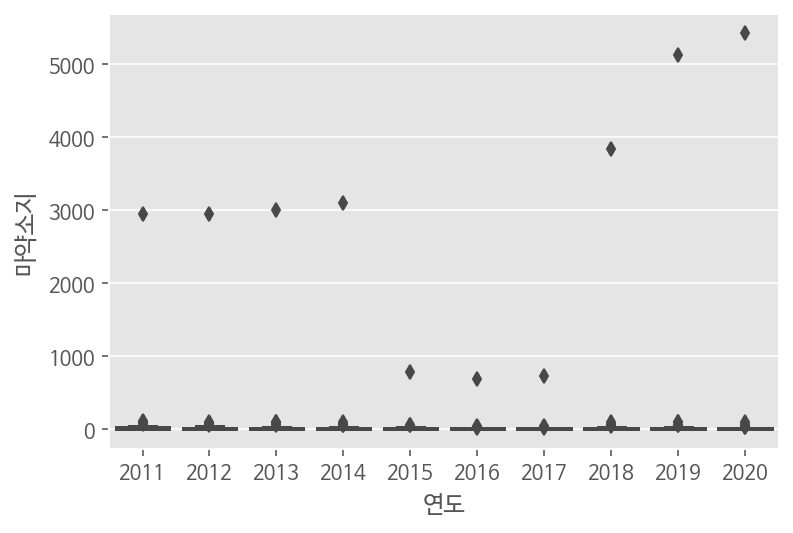

In [ ]:
sns.boxplot(data=df, x="연도", y="마약소지")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


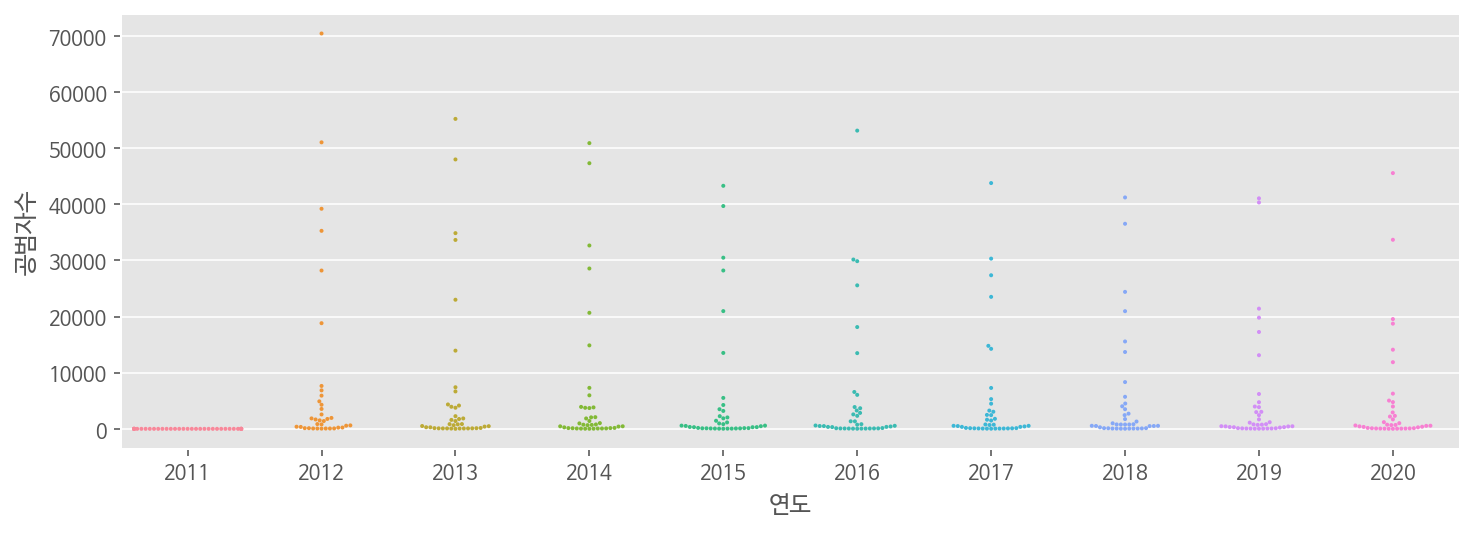

In [ ]:
# 연도별 공범자수 swarmplot 그리기
plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x="연도", y="공범자수", size=2)